# PHMSA Data Analysis

## Imports and Notebook Setup

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# import datetime packages
import datetime
from datetime import datetime, date

# imports for downloading zip files
from zipfile import ZipFile
from urllib.request import urlopen
import os

# set pandas options controlling output format  
'''
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)
'''

# import html utilities
from IPython.display import IFrame
from IPython.display import FileLink

In [3]:
# import matplotlib, seaborn, and plotnine
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
%matplotlib inline

/home/tm/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# Customizations
sns.set() # set seaborn defaults defaults

# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')
# %config InlineBackend.figure_format='retina'

In [5]:
# set prefix for generating figures
fig_date = str(datetime.now()).split()[0]
fig_prefix = f"figures/{fig_date}-tm-"

## Data Source Website

In [6]:
# IFrame('http://www.phmsa.dot.gov/pipeline/library/data-stats', width = 700, height = 350)

https://www.phmsa.dot.gov/data-and-statistics/pipeline/source-data

https://www.phmsa.dot.gov/data-and-statistics/pipeline/distribution-transmission-gathering-lng-and-liquid-accident-and-incident-data

### Download data and read into pandas dataframe and export to csv

In [7]:
url_2010_present = 'https://www.phmsa.dot.gov/sites/phmsa.dot.gov/files/data_statistics/pipeline/accident_hazardous_liquid_jan2010_present.zip'

In [8]:
url = urlopen(url_2010_present)

In [9]:
output = open('../temp_files/zipFile.zip','wb')
output.write(url.read())
output.close()

In [10]:
zip_obj = ZipFile('../temp_files/zipFile.zip', 'r')

# https://docs.python.org/3/library/zipfile.html#zipfile.ZipFile.extract

In [11]:
data_file = zip_obj.extract(zip_obj.filelist[0],path="../temp_files")

In [12]:
incid = pd.read_table(data_file, encoding='windows-1252', parse_dates=['LOCAL_DATETIME'])

/home/tm/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (62,64,65,66,67,68,69,73,75,77,78,79,80,82,90,91,103,105,118,138,139,140,172,182,183,184,185,210,212,226,228,229,240,245,249,253,264,271,273,284,288,290,292,294,296,297,302,308,310,318,322,323,335,337,341,343,371,372,375,376,381,383,385,390,401,408,409,410,411,413,415,430,431,434,437,451,462,468,469,475,476,477,480,481,482,498,504,506,508,509,516,522,524,526,529,530,531,535,536,537,545,548,551,553,554,576) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
incid.shape

(3255, 588)

In [14]:
incid.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TITLE', 'PREPARER_EMAIL', 'PREPARER_TELEPHONE',
       'PREPARER_FAX', 'PREPARED_DATE', 'AUTHORIZER_NAME', 'AUTHORIZER_TITLE',
       'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL', 'NARRATIVE'],
      dtype='object', length=588)

In [ ]:
incid.to_csv('proc_data/zip_to_csv_incidents_2010_present.csv', index=False)

### Get key to data

In [ ]:
data_key = zip_obj.extract(zip_obj.filelist[1],path="data_keys")

In [ ]:
data_key

## Explore Data

In [15]:
incident_vol = incid[['LOCAL_DATETIME','NAME','ONSHORE_CITY_NAME','ONSHORE_STATE_ABBREVIATION','REPORT_TYPE','ON_OFF_SHORE','CAUSE','CAUSE_DETAILS','STRESS_SUBTYPE','STRESS_DETAILS','SYSTEM_PART_INVOLVED','ITEM_INVOLVED','LOCATION_LATITUDE', 'LOCATION_LONGITUDE', 'COMMODITY_RELEASED_TYPE', 'UNINTENTIONAL_RELEASE_BBLS', 'RECOVERED_BBLS','NARRATIVE']]
incident_vol.head(3)

,LOCAL_DATETIME,NAME,ONSHORE_CITY_NAME,ONSHORE_STATE_ABBREVIATION,REPORT_TYPE,ON_OFF_SHORE,CAUSE,CAUSE_DETAILS,STRESS_SUBTYPE,STRESS_DETAILS,SYSTEM_PART_INVOLVED,ITEM_INVOLVED,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,NARRATIVE
0,2018-02-19 00:41:00,ENTERPRISE PRODUCTS OPERATING LLC,SKELLYTOWN,TX,ORIGINAL FINAL,ONSHORE,EQUIPMENT FAILURE,THREADED CONNECTION/COUPLING FAILURE,NaN,NaN,ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,PUMP,35.571333,-101.124274,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,3.0,0.0,ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFI...
1,2018-02-10 22:20:00,ENTERPRISE CRUDE PIPELINE LLC,MIDLAND,TX,ORIGINAL FINAL,ONSHORE,EQUIPMENT FAILURE,OTHER EQUIPMENT FAILURE,NaN,NaN,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,INSTRUMENTATION,32.015967,-102.015996,CRUDE OIL,0.3,0.3,ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2,2018-02-07 12:27:00,ENTERPRISE CRUDE PIPELINE LLC,PECOS,TX,ORIGINAL FINAL,ONSHORE,INCORRECT OPERATION,"TANK, VESSEL, OR SUMP/SEPARATOR ALLOWED OR CAU...",NaN,NaN,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,SUMP/SEPARATOR,31.526931,-103.560759,CRUDE OIL,4.0,4.0,ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...


In [16]:
incident_vol['NAME'].nunique()

258

In [17]:
incident_vol['NAME'].value_counts()

ENTERPRISE CRUDE PIPELINE LLC                        241
SUNOCO PIPELINE L.P.                                 196
ENTERPRISE PRODUCTS OPERATING LLC                    179
PLAINS PIPELINE, L.P.                                175
COLONIAL PIPELINE CO                                 156
MAGELLAN PIPELINE COMPANY, LP                        154
BUCKEYE PARTNERS, LP                                 131
PHILLIPS 66 PIPELINE LLC                             101
KINDER MORGAN LIQUID TERMINALS, LLC                  101
MARATHON PIPE LINE LLC                                97
ENBRIDGE ENERGY, LIMITED PARTNERSHIP                  81
SHELL PIPELINE CO., L.P.                              70
EXXONMOBIL PIPELINE CO                                54
ONEOK NGL PIPELINE, LLC                               53
EXPLORER PIPELINE CO                                  49
ONEOK NGL PIPELINE LP                                 39
MAGELLAN AMMONIA PIPELINE, L.P.                       38
KOCH PIPELINE COMPANY, L.P.    

In [18]:
mask = ~incident_vol['COMMODITY_RELEASED_TYPE'].str.contains('HVL ') # filter out HVL flammable

In [19]:
incid_vol_liquid_and_co2 = incident_vol[mask]

In [20]:
mask2 = ~incid_vol_liquid_and_co2['COMMODITY_RELEASED_TYPE'].str.contains('CO2')
incid_vol_liquid = incid_vol_liquid_and_co2[mask2]
#incid_vol_liquid['COMMODITY_RELEASED_TYPE']

In [21]:
incid_vol_liquid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 1 to 3253
Data columns (total 18 columns):
LOCAL_DATETIME                2707 non-null datetime64[ns]
NAME                          2707 non-null object
ONSHORE_CITY_NAME             2619 non-null object
ONSHORE_STATE_ABBREVIATION    2687 non-null object
REPORT_TYPE                   2707 non-null object
ON_OFF_SHORE                  2707 non-null object
CAUSE                         2707 non-null object
CAUSE_DETAILS                 2707 non-null object
STRESS_SUBTYPE                10 non-null object
STRESS_DETAILS                7 non-null object
SYSTEM_PART_INVOLVED          2707 non-null object
ITEM_INVOLVED                 2707 non-null object
LOCATION_LATITUDE             2707 non-null float64
LOCATION_LONGITUDE            2707 non-null float64
COMMODITY_RELEASED_TYPE       2707 non-null object
UNINTENTIONAL_RELEASE_BBLS    2707 non-null float64
RECOVERED_BBLS                2707 non-null float64
NARRATIVE          

In [22]:
incid_vol_liquid['NAME'].nunique()

211

In [23]:
incid_vol_liquid['NAME'].value_counts()

ENTERPRISE CRUDE PIPELINE LLC                        241
SUNOCO PIPELINE L.P.                                 189
PLAINS PIPELINE, L.P.                                175
COLONIAL PIPELINE CO                                 156
MAGELLAN PIPELINE COMPANY, LP                        150
BUCKEYE PARTNERS, LP                                 129
KINDER MORGAN LIQUID TERMINALS, LLC                  101
MARATHON PIPE LINE LLC                                88
PHILLIPS 66 PIPELINE LLC                              80
ENBRIDGE ENERGY, LIMITED PARTNERSHIP                  79
ENTERPRISE PRODUCTS OPERATING LLC                     64
SHELL PIPELINE CO., L.P.                              63
EXPLORER PIPELINE CO                                  49
EXXONMOBIL PIPELINE CO                                40
WYOMING PIPELINE COMPANY                              34
KOCH PIPELINE COMPANY, L.P.                           33
WEST TEXAS GULF PIPELINE CO                           33
PLANTATION PIPE LINE CO        

In [24]:
incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'].sum()

385715.42000000004

In [25]:
incid_vol_liquid['RECOVERED_BBLS'].sum()

250028.91

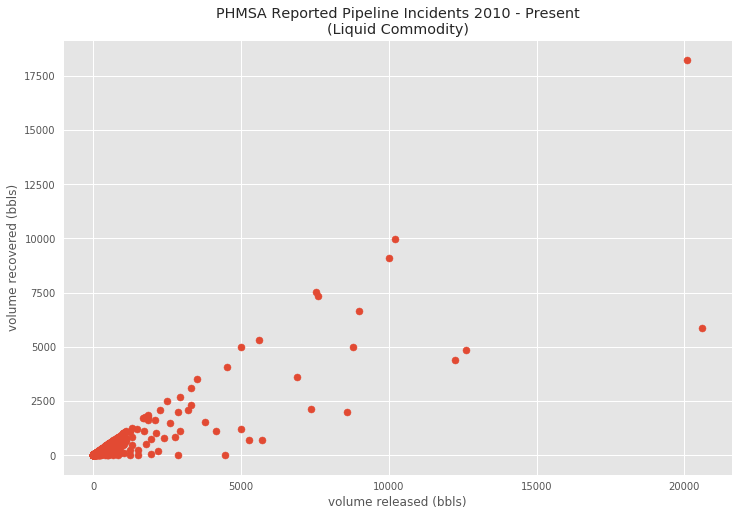

In [26]:
plt.scatter(incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'], incid_vol_liquid['RECOVERED_BBLS'])
plt.xlabel('volume released (bbls)')
plt.ylabel('volume recovered (bbls)')
plt.title('PHMSA Reported Pipeline Incidents 2010 - Present\n(Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-released-v-recovered.png", dpi=350) 

In [27]:
# look at outliers > 20000 bbl release
mask3 = incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'] > 20000

In [28]:
large_releases = incid_vol_liquid[mask3]

In [29]:
large_releases.reset_index(inplace=True)

In [30]:
large_releases

,index,LOCAL_DATETIME,NAME,ONSHORE_CITY_NAME,ONSHORE_STATE_ABBREVIATION,REPORT_TYPE,ON_OFF_SHORE,CAUSE,CAUSE_DETAILS,STRESS_SUBTYPE,STRESS_DETAILS,SYSTEM_PART_INVOLVED,ITEM_INVOLVED,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,NARRATIVE
0,1935,2013-07-29 00:00:00,TESORO HIGH PLAINS PIPELINE COMPANY LLC,NaN,ND,SUPPLEMENTAL FINAL,ONSHORE,NATURAL FORCE DAMAGE,LIGHTNING,NaN,NaN,"ONSHORE PIPELINE, INCLUDING VALVE SITES",PIPE,48.524251,-102.856912,CRUDE OIL,20600.0,5856.0,"ON SEPTEMBER 29, 2013, TESORO HIGH PLAINS PIPE..."
1,3060,2010-07-25 17:58:00,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",MARSHALL,MI,SUPPLEMENTAL FINAL,ONSHORE,MATERIAL FAILURE OF PIPE OR WELD,ENVIRONMENTAL CRACKING-RELATED,STRESS CORROSION CRACKING,NaN,"ONSHORE PIPELINE, INCLUDING VALVE SITES",PIPE,42.243290,-84.972510,CRUDE OIL,20082.0,18245.0,"ON JULY 26, 2010, ENBRIDGE CONFIRMED A MAINLIN..."


In [31]:
large_releases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 19 columns):
index                         2 non-null int64
LOCAL_DATETIME                2 non-null datetime64[ns]
NAME                          2 non-null object
ONSHORE_CITY_NAME             1 non-null object
ONSHORE_STATE_ABBREVIATION    2 non-null object
REPORT_TYPE                   2 non-null object
ON_OFF_SHORE                  2 non-null object
CAUSE                         2 non-null object
CAUSE_DETAILS                 2 non-null object
STRESS_SUBTYPE                1 non-null object
STRESS_DETAILS                0 non-null object
SYSTEM_PART_INVOLVED          2 non-null object
ITEM_INVOLVED                 2 non-null object
LOCATION_LATITUDE             2 non-null float64
LOCATION_LONGITUDE            2 non-null float64
COMMODITY_RELEASED_TYPE       2 non-null object
UNINTENTIONAL_RELEASE_BBLS    2 non-null float64
RECOVERED_BBLS                2 non-null float64
NARRATIVE               

## Export large releases to geojson file

In [33]:
import json
import geojson

In [ ]:
##### SOMETHING NOT WORKING RIGHT

In [ ]:
def data2geojson(df):
    points = []
    df.apply(lambda X: points.append((X[["LOCATION_LONGITUDE"]],
                                     X[["LOCATION_LATITUDE"]]), axis=1))
    with open('map.geojson', 'w') as fp:
        geojson.dump(geojson.MultiPoint(points), fp, sort_keys=True)

In [34]:
large_releases[['LOCATION_LONGITUDE', 'LOCATION_LATITUDE']]

,LOCATION_LONGITUDE,LOCATION_LATITUDE
0,-102.856912,48.524251
1,-84.972510,42.243290


In [35]:
with open('map.geojson', 'w') as fp:
    geojson.dump(geojson.MultiPoint([(-102.856912,48.524251),(-84.972510,42.243290)]), fp, sort_keys=True)

## Review Chevron releases

In [36]:
incid_vol_liquid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 1 to 3253
Data columns (total 18 columns):
LOCAL_DATETIME                2707 non-null datetime64[ns]
NAME                          2707 non-null object
ONSHORE_CITY_NAME             2619 non-null object
ONSHORE_STATE_ABBREVIATION    2687 non-null object
REPORT_TYPE                   2707 non-null object
ON_OFF_SHORE                  2707 non-null object
CAUSE                         2707 non-null object
CAUSE_DETAILS                 2707 non-null object
STRESS_SUBTYPE                10 non-null object
STRESS_DETAILS                7 non-null object
SYSTEM_PART_INVOLVED          2707 non-null object
ITEM_INVOLVED                 2707 non-null object
LOCATION_LATITUDE             2707 non-null float64
LOCATION_LONGITUDE            2707 non-null float64
COMMODITY_RELEASED_TYPE       2707 non-null object
UNINTENTIONAL_RELEASE_BBLS    2707 non-null float64
RECOVERED_BBLS                2707 non-null float64
NARRATIVE          

In [37]:
incid_cvx = incid_vol_liquid[incid_vol_liquid['NAME'].str.contains('CHEVRON')]

In [40]:
incid_cvx

,LOCAL_DATETIME,NAME,ONSHORE_CITY_NAME,ONSHORE_STATE_ABBREVIATION,REPORT_TYPE,ON_OFF_SHORE,CAUSE,CAUSE_DETAILS,STRESS_SUBTYPE,STRESS_DETAILS,SYSTEM_PART_INVOLVED,ITEM_INVOLVED,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,NARRATIVE
1454,2014-09-16 12:45:00,CHEVRON U.S.A. INC,PORT FOURCHON,LA,SUPPLEMENTAL FINAL,ONSHORE,CORROSION FAILURE,INTERNAL CORROSION,NaN,NaN,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,AUXILIARY PIPING (E.G. DRAIN LINES),29.105684,-90.192503,CRUDE OIL,0.02,0.02,"A SMALL LEAK IN THE 6 O'CLOCK POSITION OF A 2""..."
1575,2014-05-24 17:27:00,CHEVRON PIPE LINE CO,MISSOURI TRIANGLE,CA,SUPPLEMENTAL FINAL,ONSHORE,EQUIPMENT FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,NaN,NaN,ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,PUMP,35.280360,-119.422380,CRUDE OIL,0.24,0.24,ON MAY 24TH 2014 CPL CONTROL CENTER SENT A SHU...
1722,2014-02-17 10:50:00,CHEVRON PRODUCTS COMPANY - HAWAII,KAPOLEI,HI,SUPPLEMENTAL FINAL,ONSHORE,CORROSION FAILURE,EXTERNAL CORROSION,NaN,NaN,"ONSHORE PIPELINE, INCLUDING VALVE SITES",PIPE,21.316680,-158.099930,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,3.00,3.00,"ON FEBRUARY 17, 2014 AT 10:50 AM OUTSIDE CALLE..."
1748,2014-01-29 07:25:00,CHEVRON PIPE LINE CO,BURAS,LA,SUPPLEMENTAL FINAL,ONSHORE,EQUIPMENT FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,NaN,NaN,ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,PUMP,29.374592,-89.552288,CRUDE OIL,0.12,0.12,AT APPROXIMATELY 0725 CST ON 29JAN14 A RELEASE...
1965,2013-06-30 09:30:00,CHEVRON U.S.A. INC,NaN,NaN,ORIGINAL FINAL,OFFSHORE,CORROSION FAILURE,EXTERNAL CORROSION,NaN,NaN,"OFFSHORE PIPELINE, INCLUDING RISER AND RISER BEND",PIPE,29.107880,-90.162120,CRUDE OIL,0.01,0.00,"AT 0930 HRS. THE MORNING OF JUNE 30, 2013, A S..."
1994,2013-05-31 00:30:00,CHEVRON PIPE LINE CO,MYTON,UT,SUPPLEMENTAL FINAL,ONSHORE,EQUIPMENT FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,NaN,NaN,ONSHORE PUMP/METER STATION EQUIPMENT AND PIPING,AUXILIARY PIPING (E.G. DRAIN LINES),40.160050,-110.077696,CRUDE OIL,10.00,10.00,"AT APPROXIMATELY 00:30 CDT ON 31MAY13, PERSONN..."
2089,2013-03-18 15:26:00,CHEVRON PIPE LINE CO,WILLARD,UT,SUPPLEMENTAL FINAL,ONSHORE,CORROSION FAILURE,EXTERNAL CORROSION,NaN,NaN,"ONSHORE PIPELINE, INCLUDING VALVE SITES",PIPE,41.419421,-112.052591,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,499.00,499.00,"AT APPROXIMATELY 1526 CDT ON 18MAR13, THE CPL ..."
2157,2013-01-28 12:42:00,CHEVRON PIPE LINE CO,BOISE,ID,SUPPLEMENTAL FINAL,ONSHORE,NATURAL FORCE DAMAGE,TEMPERATURE,NaN,NaN,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,VALVE,43.606700,-116.249000,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,15.00,13.00,TANK 207 HAS AN EXTERNAL FLOATING ROOF DESIGN ...
2252,2012-11-07 10:40:00,CHEVRON PIPE LINE CO,GARDENA,CA,SUPPLEMENTAL FINAL,ONSHORE,CORROSION FAILURE,INTERNAL CORROSION,NaN,NaN,"ONSHORE PIPELINE, INCLUDING VALVE SITES",PIPE,33.902032,-118.313486,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,20.00,0.00,THE #21-8 AND #3-8 PIPELINES WERE SHUT DOWN BA...
2270,2012-10-17 17:30:00,CHEVRON PIPE LINE CO,BYRON,CA,SUPPLEMENTAL FINAL,ONSHORE,EQUIPMENT FAILURE,"FAILURE OF EQUIPMENT BODY (EXCEPT PUMP), TANK ...",NaN,NaN,"ONSHORE PIPELINE, INCLUDING VALVE SITES",VALVE,37.817000,-121.587000,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.24,0.00,AT APPROXIMATELY 1730 A RELEASE OF 10 GALLONS ...


In [43]:
incid_cvx_all = incid[(incid['NAME'].str.contains('CHEVRON')) & (incid['ONSHORE_STATE_ABBREVIATION'] == 'CO')]

In [45]:
incid_cvx_all

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE


In [ ]:
incid_vol_liquid.to_csv('2017-03-01-incidents.csv')

In [ ]:
incid_vol_liquid['PERCENT_RECOV'] = (incid_vol_liquid['RECOVERED_BBLS'] / incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS']) * 100
incid_vol_liquid['PERCENT_RECOV'].head()

In [ ]:
incid_vol_liquid['PERCENT_RECOV'].plot(kind = 'hist', bins = 10)
plt.xlabel('percent recovery')
plt.ylabel('number of incidents')
plt.title('PHMSA Reported Pipeline Incidents 2010 - Present\n(Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-percent-recovery.png", dpi=350)

In [ ]:
plt.scatter(incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'], incid_vol_liquid['PERCENT_RECOV'])
plt.xlabel('volume released (bbls)')
plt.ylabel('percent recovered')
plt.title('PHMSA Reported Pipeline Incidents 2010 - Present\n(Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-percent-recovered-by-vol-released.png", dpi=350)

In [ ]:
incid_vol_liquid['CAUSE'].value_counts().plot(kind = 'pie', legend=False)
plt.savefig(fig_prefix + "major-incident-causes-pie.png", dpi=350)

In [ ]:
incid_vol_liquid.columns

In [ ]:
incid_vol_liquid[['CAUSE', 'CAUSE_DETAILS']].head(3)

In [ ]:
causes = incid_vol_liquid['CAUSE_DETAILS'].value_counts().sort_values(ascending=True)
causes.tail()

In [ ]:
# sns.barplot(causes.values, causes.index)
causes.plot.barh()
plt.xlabel('number of incidents')
plt.title('Causes of PHMSA Reported Pipeline Incidents\n(2010 - Present for Liquid Commodity)')
plt.savefig(fig_prefix + "frequency-of-causes.png", dpi=350)

In [ ]:
incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'].sum()

In [ ]:
mask4 = incid_vol_liquid['CAUSE_DETAILS'] == 'INTERNAL CORROSION'

In [ ]:
incid_ic = incid_vol_liquid[mask4]

In [ ]:
incid_ic['UNINTENTIONAL_RELEASE_BBLS'].sum()

In [ ]:
causes_dict = {}
for item in causes.index:
    item_bbl_sum = incid_vol_liquid[incid_vol_liquid['CAUSE_DETAILS'] == item]['UNINTENTIONAL_RELEASE_BBLS'].sum()
    print('Cause {} resulted in total releases of {} bbls from 2010 to present'.format(item, item_bbl_sum))
    causes_dict[item] = item_bbl_sum

In [ ]:
causes_dict

In [ ]:
causes_series = pd.Series(causes_dict).sort_values(ascending=True)
causes_series.tail()

In [ ]:
# sns.barplot(causes_series.values, causes_series.index)
causes_series.plot.barh()
plt.xlabel('total volume released (bbls)')
plt.title('Causes of PHMSA Reported Pipeline Incidents\n(2010 - Present for Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-released-by-cause.png", dpi=350)

In [ ]:
causes.head()
causes['INTENTIONAL DAMAGE']

In [ ]:
causes_rate_dict = {}
for item in causes.index:
    item_bbl_sum = incid_vol_liquid[incid_vol_liquid['CAUSE_DETAILS'] == item]['UNINTENTIONAL_RELEASE_BBLS'].sum()
    item_count = causes[item]
    print('Cause {} resulted in averaage of {} bbls per release from 2010 to present'.format(item, item_bbl_sum))
    causes_rate_dict[item] = item_bbl_sum / item_count

In [ ]:
causes_rate_series = pd.Series(causes_rate_dict).sort_values(ascending=True)
causes_rate_series.tail()

In [ ]:
causes_rate_series.plot.barh()
plt.xlabel('total volume released PER incident (bbls)')
plt.title('Causes of PHMSA Reported Pipeline Incidents\n(2010 - Present for Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-released-per-incident-by-cause.png", dpi=350)

In [ ]:
mask5 = incid_vol_liquid['CAUSE_DETAILS'] == 'ENVIRONMENTAL CRACKING-RELATED'
env_cracking = incid_vol_liquid[mask5]

In [ ]:
env_cracking[['NAME', 'STRESS_SUBTYPE', 'STRESS_DETAILS', 'UNINTENTIONAL_RELEASE_BBLS']]

In [ ]:
incid_vol_top_10 = incid_vol_liquid.sort(columns=['UNINTENTIONAL_RELEASE_BBLS'], ascending=False).head(10)

In [ ]:
incid_vol_top_10[['UNINTENTIONAL_RELEASE_BBLS', 'NARRATIVE']]

In [ ]:
incid_vol_top_10['NARRATIVE'][1475]

In [ ]:
incid_vol_top_10['NARRATIVE'][2601]

In [ ]:
incid_vol_top_10['NARRATIVE'][2299]

In [ ]:
mask6 = incid_vol_liquid['NAME'].str.contains('PLAINS')

In [ ]:
plains = incid_vol_liquid[mask6]

In [ ]:
plains.columns

In [ ]:
plains[['ONSHORE_CITY_NAME', 'ONSHORE_STATE_ABBREVIATION']]

In [ ]:
mask7 = plains['ONSHORE_STATE_ABBREVIATION'] == 'CA'

In [ ]:
plains_ca = plains[mask7]

In [ ]:
plains_ca['NARRATIVE'].str.contains('SANTA')

In [ ]:
plains_ca['NARRATIVE'][692]

In [ ]:
incidents.iloc[692]